# Regression Model

## Linear Regression

**Linear regression** is a simple machine learning method that can be used to predict an observation's value based on the relationship between target variable and independent, linearly-related numeric predictive features.   Within linear regression, there's simple linear regression where there's one predictor and one predictant, and there's multiple linear regression where there's multiple predictors and one predictant.

**Assumptions:**
- All variables are continuous numerical.
- The data is free of missing values and outliers.
- There's a linear relationship between features and target.
- All features are independent of one another.
- Residuals are normally distributed.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

from sklearn import datasets

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8

### Simple Linear Regression

In [19]:
x = abs(np.random.randn(100,1)* np.random.randint(10))
x

array([[3.20937912e+00],
       [6.41734253e+00],
       [1.29524057e+01],
       [9.84636886e+00],
       [9.40226976e+00],
       [2.41018830e+00],
       [3.95947937e+00],
       [1.31008340e+00],
       [7.38457642e-01],
       [1.42956843e+01],
       [5.27733055e+00],
       [1.18585577e+01],
       [7.68964422e-01],
       [6.55481049e+00],
       [5.58525783e+00],
       [1.62922794e+00],
       [5.98567621e+00],
       [5.93901432e+00],
       [4.97877991e-03],
       [7.71207073e+00],
       [2.91713375e+00],
       [2.57327278e-02],
       [1.87429400e+01],
       [7.88209932e-01],
       [1.17428394e+01],
       [1.70646713e+01],
       [1.94313243e+01],
       [3.02716729e+00],
       [2.30642207e+01],
       [2.05879038e+01],
       [1.93791861e+00],
       [9.22914647e-01],
       [7.71681075e+00],
       [3.01689542e+00],
       [1.93875370e+00],
       [2.98357059e+00],
       [9.23065306e+00],
       [9.11681730e+00],
       [1.20433434e+01],
       [2.40010023e+01],


In [20]:
target = np.random.randint(150) + np.random.randint(20)*x
target

array([[ 83.67503296],
       [109.33874022],
       [161.61924547],
       [136.77095092],
       [133.21815808],
       [ 77.2815064 ],
       [ 89.67583494],
       [ 68.48066718],
       [ 63.90766114],
       [172.36547405],
       [100.21864439],
       [152.86846156],
       [ 64.15171537],
       [110.43848393],
       [102.68206263],
       [ 71.03382354],
       [105.88540964],
       [105.51211459],
       [ 58.03983024],
       [119.69656581],
       [ 81.33706999],
       [ 58.20586182],
       [207.94351978],
       [ 64.30567945],
       [151.94271494],
       [194.51737033],
       [213.45059459],
       [ 82.21733834],
       [242.51376551],
       [222.70323041],
       [ 73.5033489 ],
       [ 65.38331718],
       [119.73448601],
       [ 82.13516337],
       [ 73.51002957],
       [ 81.8685647 ],
       [131.84522447],
       [130.93453843],
       [154.3467476 ],
       [250.00801867],
       [106.39888157],
       [122.51129028],
       [247.24658581],
       [155

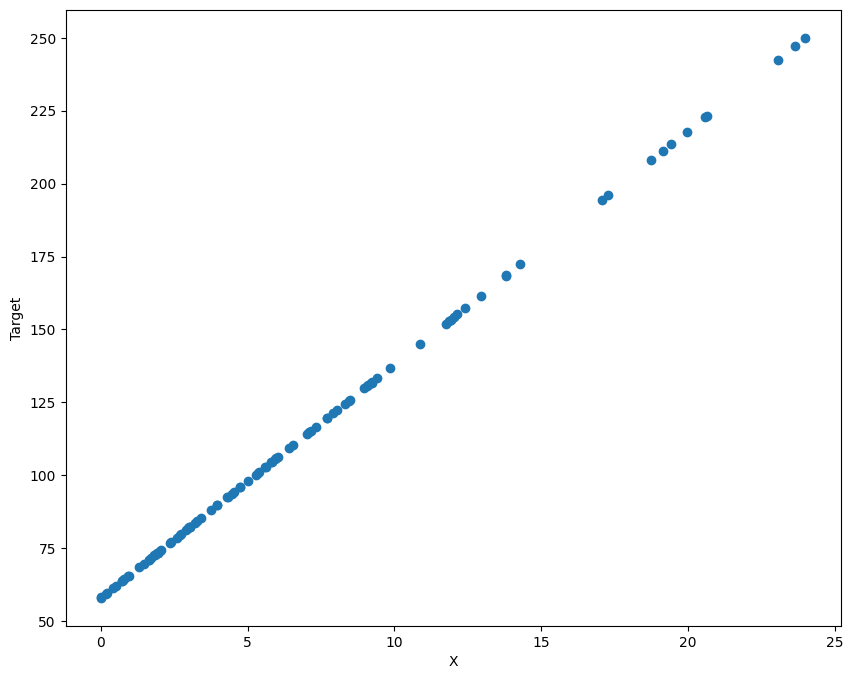

In [21]:
plt.scatter(x, target)

plt.xlabel('X')
plt.ylabel('Target')

plt.show()

In [22]:
lin_model = LinearRegression()

lin_model.fit(x,target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
lin_model.score(x, target) #to be used later using test 

1.0

In [23]:
lin_model.intercept_ , lin_model.coef_

(array([58.]), array([[8.]]))

In [26]:
for i,j in enumerate(x):
    print(j * 8 + 58, target[i])

[83.67503296] [83.67503296]
[109.33874022] [109.33874022]
[161.61924547] [161.61924547]
[136.77095092] [136.77095092]
[133.21815808] [133.21815808]
[77.2815064] [77.2815064]
[89.67583494] [89.67583494]
[68.48066718] [68.48066718]
[63.90766114] [63.90766114]
[172.36547405] [172.36547405]
[100.21864439] [100.21864439]
[152.86846156] [152.86846156]
[64.15171537] [64.15171537]
[110.43848393] [110.43848393]
[102.68206263] [102.68206263]
[71.03382354] [71.03382354]
[105.88540964] [105.88540964]
[105.51211459] [105.51211459]
[58.03983024] [58.03983024]
[119.69656581] [119.69656581]
[81.33706999] [81.33706999]
[58.20586182] [58.20586182]
[207.94351978] [207.94351978]
[64.30567945] [64.30567945]
[151.94271494] [151.94271494]
[194.51737033] [194.51737033]
[213.45059459] [213.45059459]
[82.21733834] [82.21733834]
[242.51376551] [242.51376551]
[222.70323041] [222.70323041]
[73.5033489] [73.5033489]
[65.38331718] [65.38331718]
[119.73448601] [119.73448601]
[82.13516337] [82.13516337]
[73.51002957] 

### Multiple Linear Regression

In [14]:
features = 6

x,y = datasets.make_regression(n_features=features, n_samples = 100, noise=0)

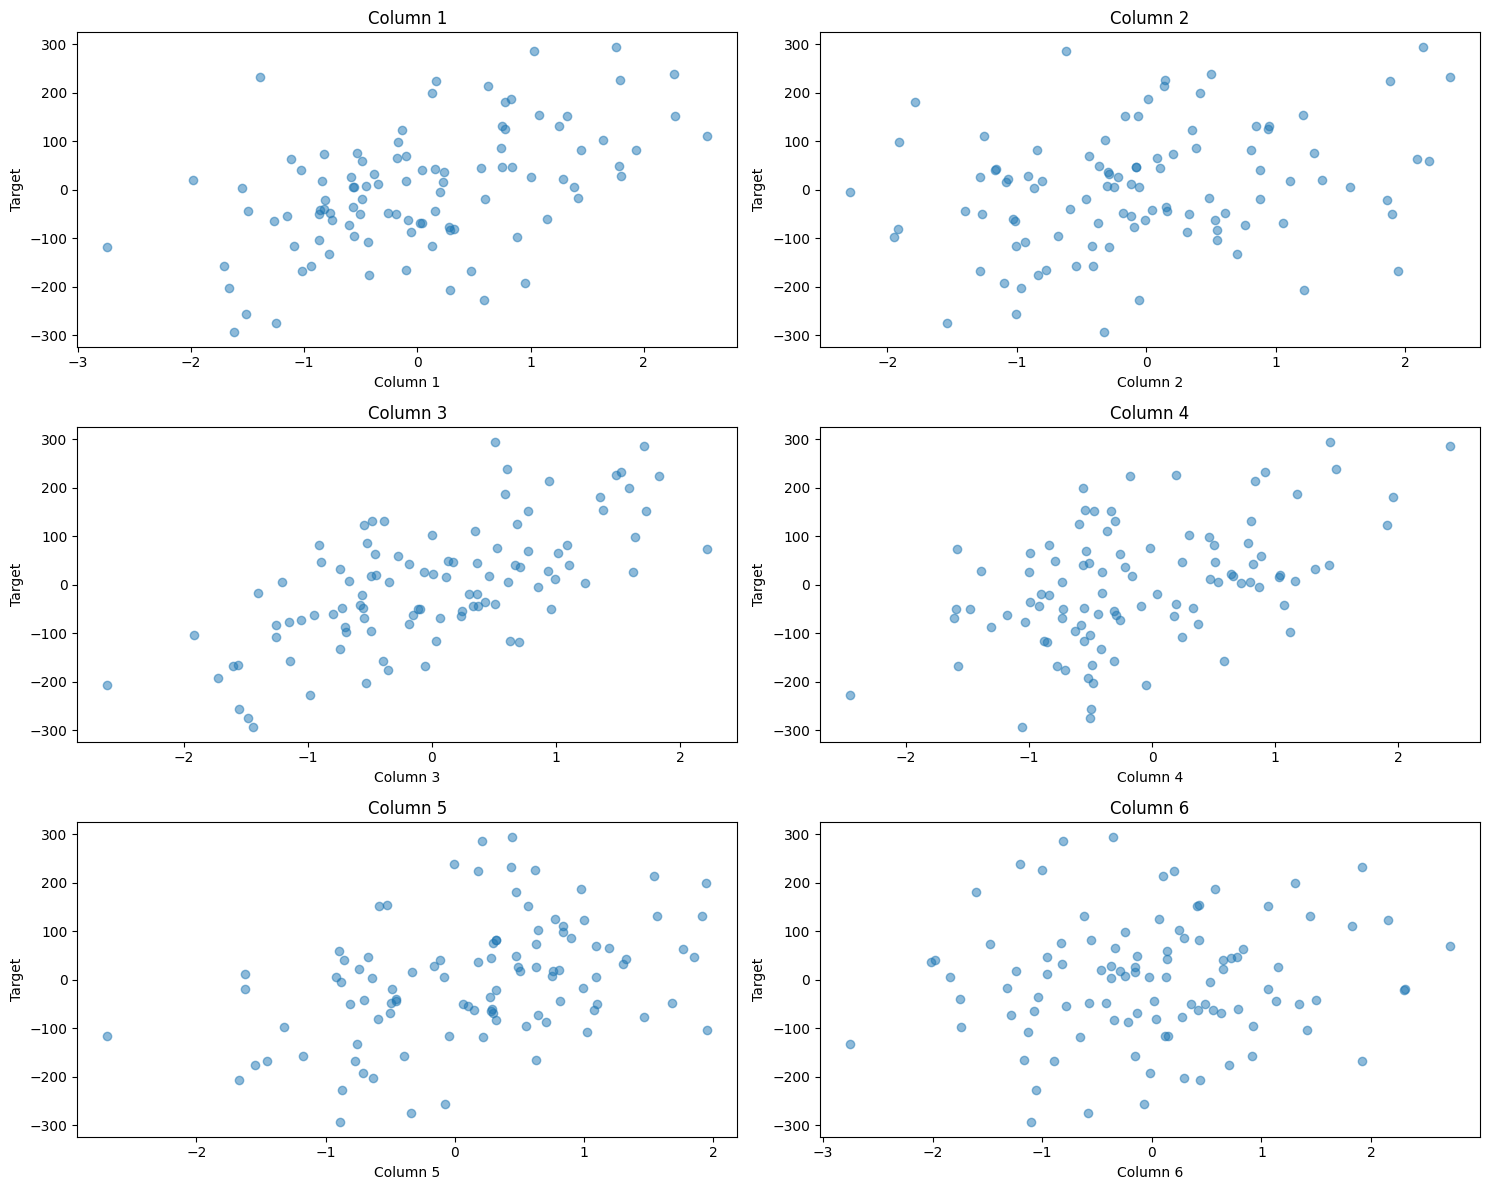

In [15]:
data = pd.DataFrame(x, columns=[f'Column {i+1}' for i in range(features)])

cols = 2
rows = 3

# 3. Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

for i, col_name in enumerate(data.columns):
    axes[i].scatter(data[col_name], y, alpha=0.5)
    axes[i].set_title(f'{col_name}')
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Target')

# 4. Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
data['Target'] = y

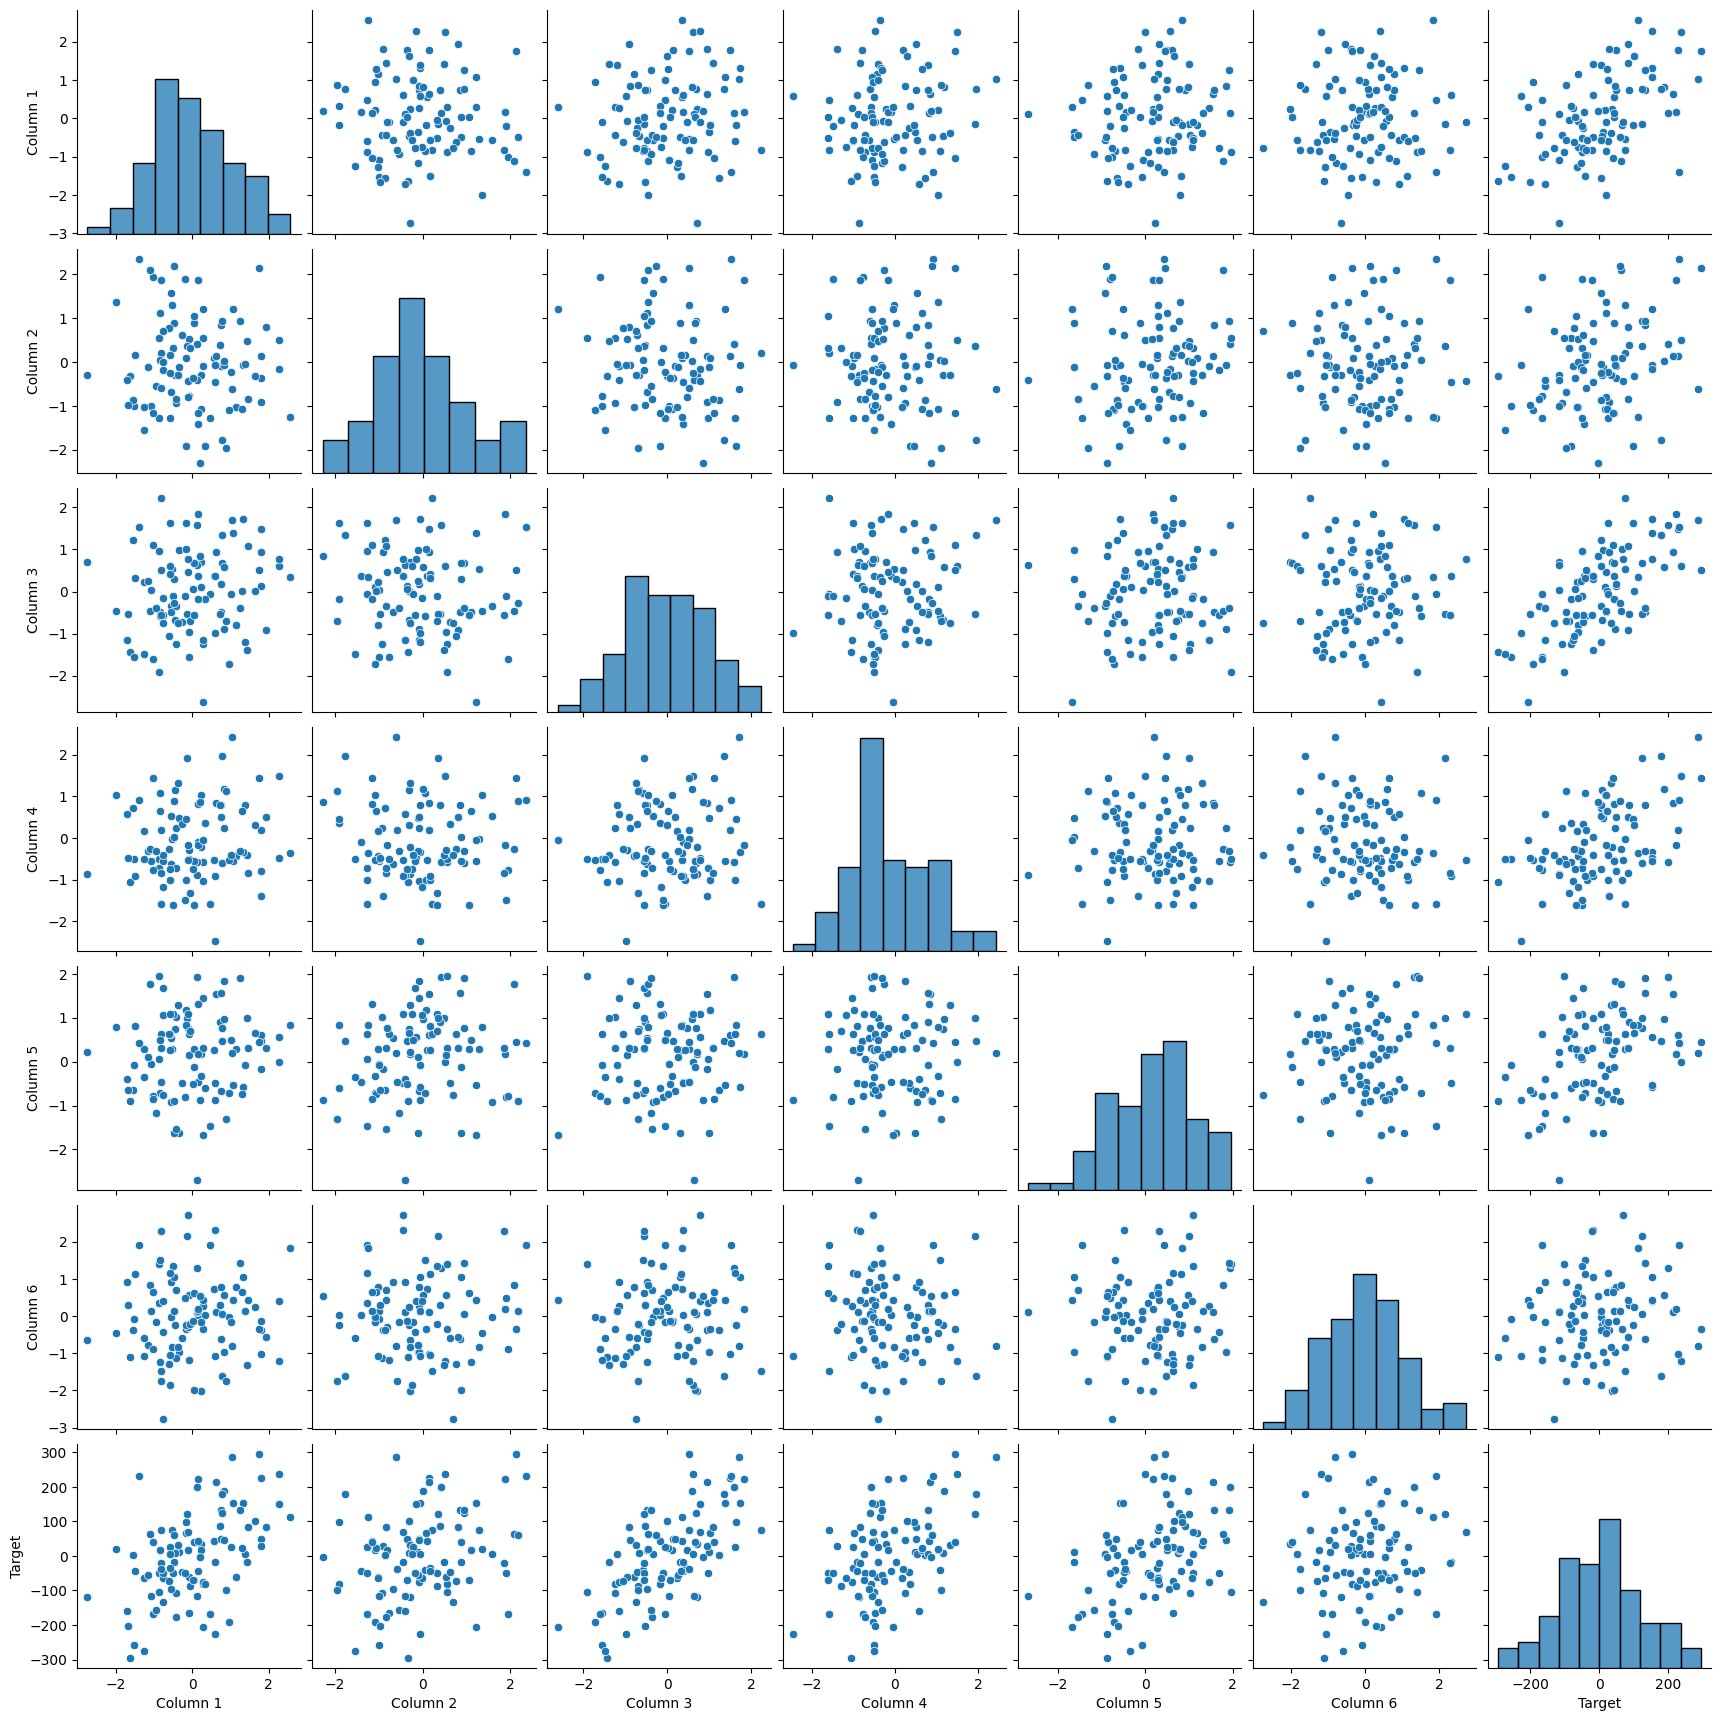

In [17]:
sns.pairplot(data)

In [18]:
data.corr()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Target
Column 1,1.000000,-0.065047,0.138964,0.118447,0.088227,0.044553,0.504864
Column 2,-0.065047,1.000000,-0.103244,-0.040853,0.140275,0.058632,0.277273
Column 3,0.138964,-0.103244,1.000000,0.091793,0.034403,0.054375,0.669349
Column 4,0.118447,-0.040853,0.091793,1.000000,0.031629,-0.097099,0.481307
Column 5,0.088227,0.140275,0.034403,0.031629,1.000000,0.056525,0.414263
Column 6,0.044553,0.058632,0.054375,-0.097099,0.056525,1.000000,0.100205
Target,0.504864,0.277273,0.669349,0.481307,0.414263,0.100205,1.000000


## Logistic Regression